# Statistics for Data Science

##### Dataset: Housing prices derived from the U.S Census Service to present insights to higher management.

- ###### Is there a significant difference in the median value of houses bounded by the Charles river or not?
- ###### Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- ###### Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- ###### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

##### Task 1: Familiarize with the dataset 
##### Task 2: Load the dataset in a Jupyter Notebook 
##### Task 3: Generate basic statistics and visualization
##### Task 4: Use the appropriate tests 
##### Task 5: Share the jupyter notebook

In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

In [4]:
from js import fetch
import io

###### CRIM - per capita crime rate by town
###### ZN - proportion of residential land zoned for lots over 25, 000 sq.ft
###### **INDUS - proportion of non-retail business acres per town**
###### **CHAS - Charles River dummy variable 1  if track bounds river, 0 otherwise**
###### **NOX - nitric oxides concentration**
###### RM - average # of rooms per dwelling
###### **AGE - proportion of owner-occupied units built prior to 1940**
###### **DIS - weighted distance to five Boston employment centres**
###### RAD - index of accessibility to radial highways
###### TAX - full-value property tax rate per 10,000 dolars
###### **PTRATIO - pupill-teacher ration by town**
###### LSTAT - % lower status of the population
###### **MEDV - median value of owner-occypied homes in 1000$**

In [6]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
ratings_df=pd.read_csv(ratings_url)

In [8]:
ratings_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [10]:
del ratings_df[ratings_df.columns [0]]

In [11]:
ratings_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [12]:
ratings_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
ratings_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Descriptive Statistics and Visualization

- For the MEDV provide a boxplot;

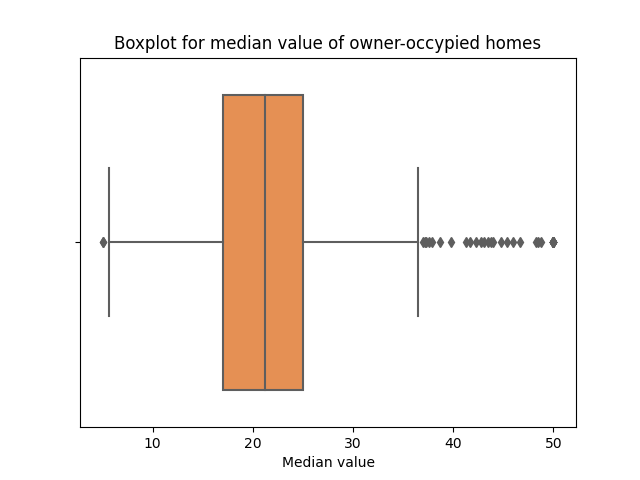

In [30]:
box = sns.boxplot(data = ratings_df, x = 'MEDV', palette='Oranges')
box.set(xlabel = "Median value"
        , title = "Boxplot for median value of owner-occypied homes")
plt.show()

- Provide a  bar plot for the Charles river variable

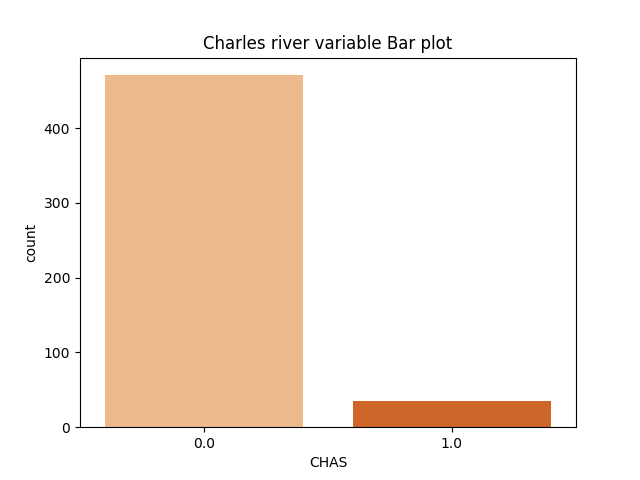

In [33]:
ax = sns.countplot(data=ratings_df, x='CHAS', palette='Oranges')
ax.set_title("Charles river variable Bar plot") 
plt.show()

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

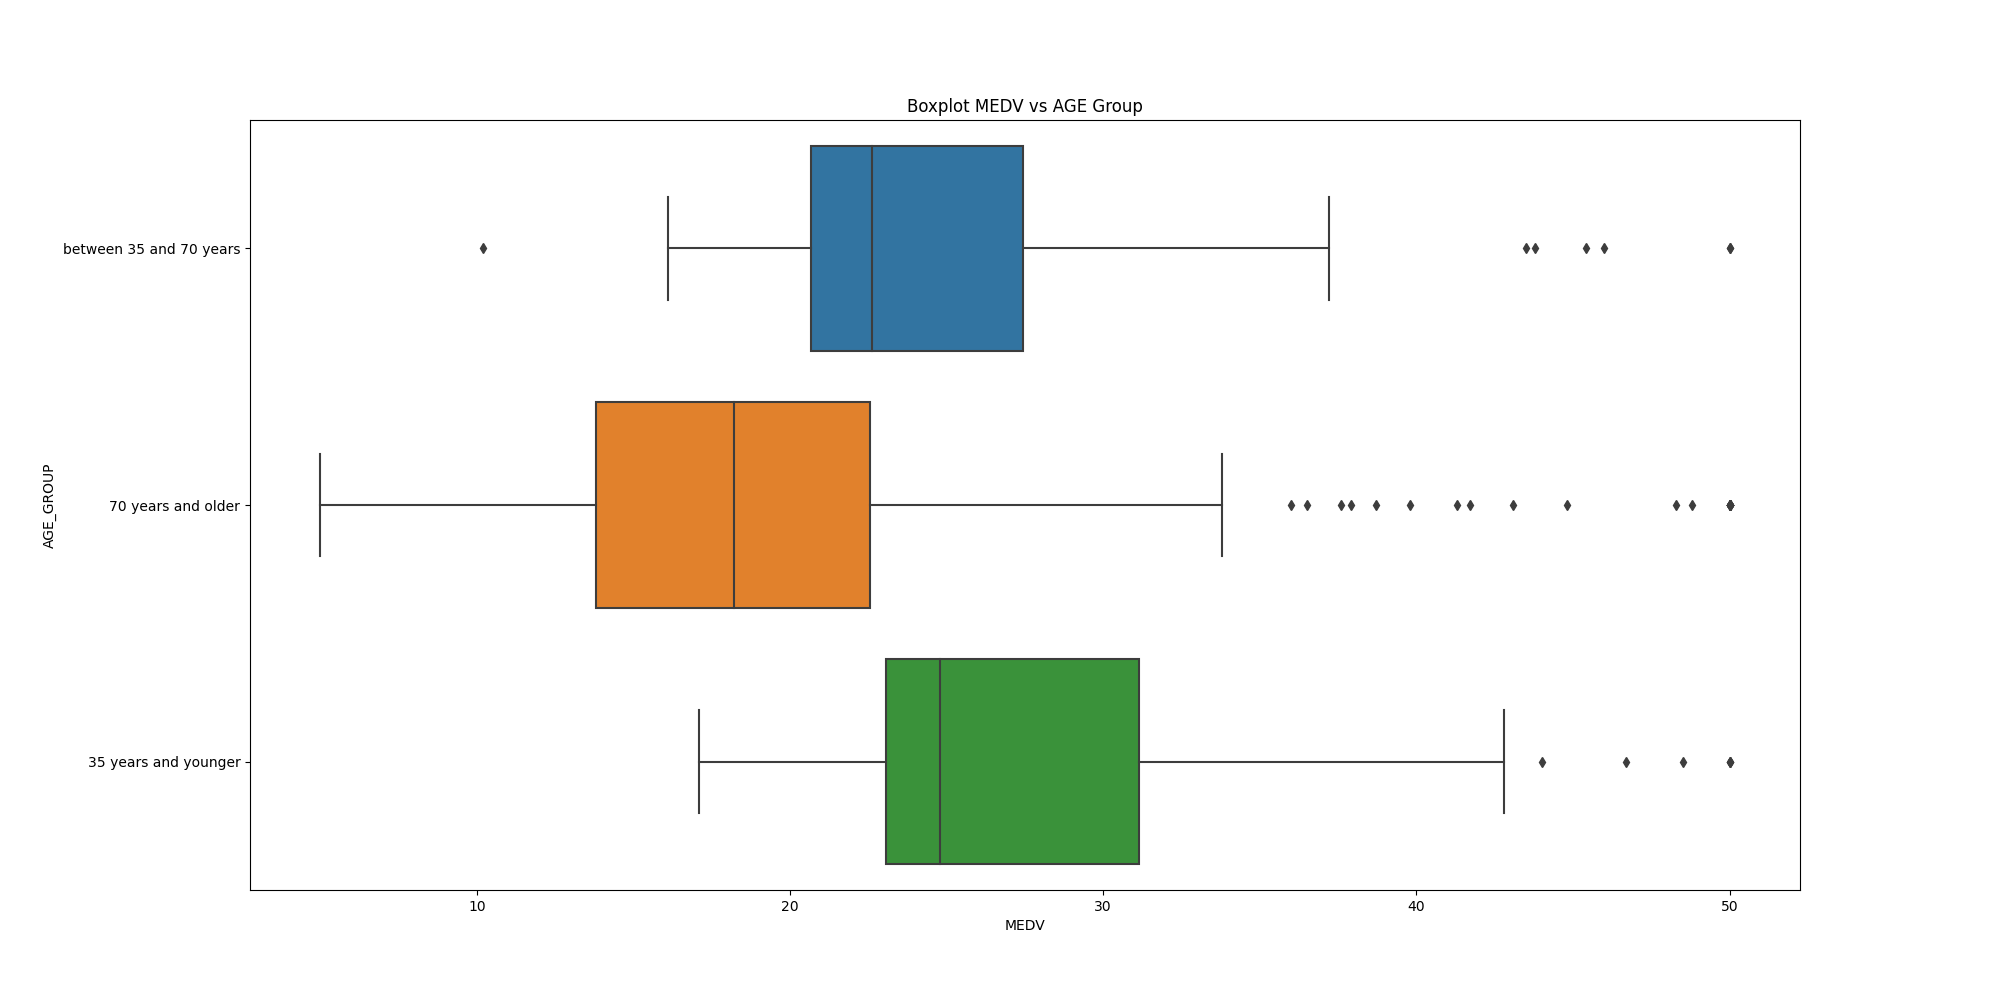

In [55]:
ratings_df.loc[ratings_df['AGE'] <=35, 'AGE_GROUP'] = '35 years and younger'
ratings_df.loc[(ratings_df['AGE']> 35) & (ratings_df['AGE']<=70), 'AGE_GROUP'] = 'between 35 and 70 years'
ratings_df.loc[ratings_df['AGE']>70, 'AGE_GROUP'] = '70 years and older'
plt.figure(figsize=(20,10))
sns.boxplot(data=ratings_df, x='MEDV', y='AGE_GROUP')
plt.title("Boxplot MEDV vs AGE Group")
plt.show()

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

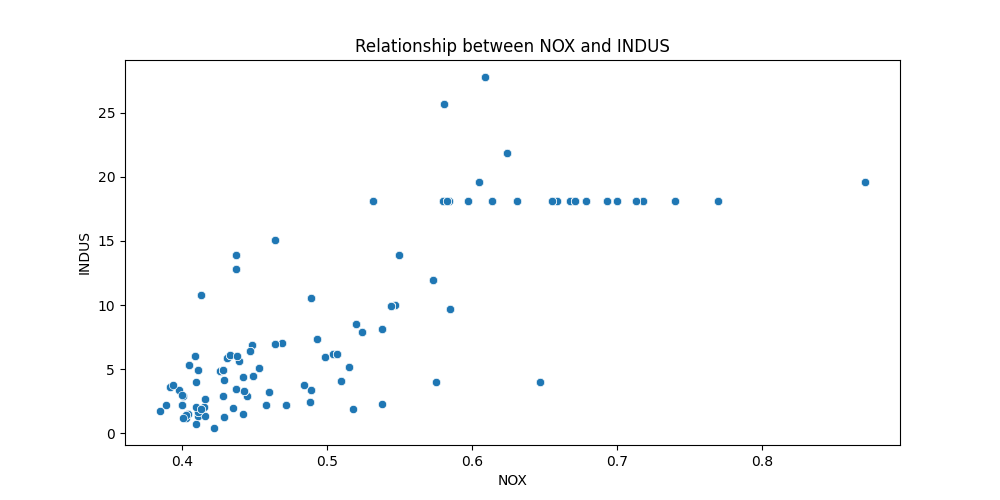

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'NOX', y='INDUS', data=ratings_df)
plt.title("Relationship between NOX and INDUS")
plt.show() 

- Create a histogram for the pupil to teacher ratio variable

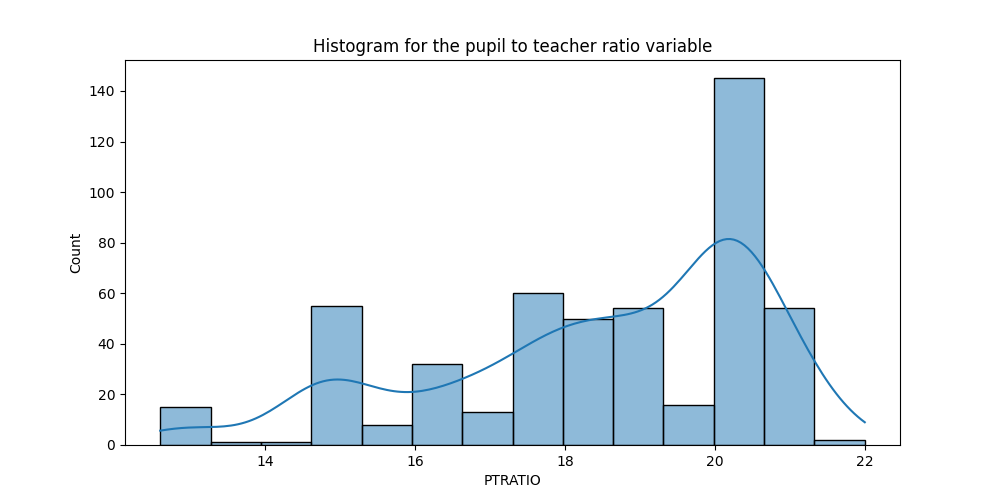

In [84]:
sns.histplot(data=ratings_df, x='PTRATIO', kde=True)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show() 

### Appropriate tests to answer the questions

#### Is there a significant difference in the median value of houses bounded by the Charles river or not?
###### T-student test (T-test) & Levene test 

1. H0 (Null Hypothesis): MEDV equalt to CHAS ==
2. H1 (Alternative Hypothesis):MEDV not equal CHAS =

In [85]:
H0 = ratings_df[ratings_df['MEDV'] == 0.0]['CHAS']
H1 = ratings_df[ratings_df['MEDV'] == 1.0]['CHAS']

In [98]:
# Executing information from all data frame for CHAS & MEDV 
ratings_df1 = ratings_df[['CHAS', 'MEDV']]

In [97]:
# Statistical information for columns CHAS & MEDV
ratings_df1.describe()

,CHAS,MEDV
count,506.000000,506.000000
mean,0.069170,22.532806
std,0.253994,9.197104
min,0.000000,5.000000
25%,0.000000,17.025000
50%,0.000000,21.200000
75%,0.000000,25.000000
max,1.000000,50.000000


In [101]:
# Median value for Chas and Medv
ratings_df1.median()
# it is clear that these sums are not mathematically equal, but for complete 100% certainty, we will conduct the tests

CHAS     0.0
MEDV    21.2
dtype: float64

In [110]:
# T tests (Student's t-test)
scipy.stats.ttest_ind(ratings_df['MEDV'], ratings_df['CHAS'])
# P value = 1 / 1,4651540072350996e in power of 305 wich mean that value tend to 0
# which in turn means that p-value is lower than the alpha value (0.05).
# So we can conclude that there is significant difference between the values

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [111]:
# Levene Test (mathematical comparison of variance values)  
scipy.stats.levene(ratings_df['MEDV'], ratings_df['CHAS'], center = 'mean')
# P value also tend to 0, Leven's test confirms the results and conclusions of the T-student's test 

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

#### Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
###### Analysis of Variance test (ANOVA)

In [117]:
H0 = ratings_df[ratings_df['MEDV'] == 0.0]['AGE_GROUP']
H1 = ratings_df[ratings_df['MEDV'] == 1.0]['AGE_GROUP']

In [134]:
ratings_df2 = ratings_df[['MEDV','AGE_GROUP']]

In [138]:
ratings_df2

,MEDV,AGE_GROUP
0,24.0,between 35 and 70 years
1,21.6,70 years and older
2,34.7,between 35 and 70 years
3,33.4,between 35 and 70 years
4,36.2,between 35 and 70 years
...,...,...
501,22.4,between 35 and 70 years
502,20.6,70 years and older
503,23.9,70 years and older
504,22.0,70 years and older


In [177]:
ratings_df3=ratings_df[['MEDV']]

In [169]:
ratings_df["AGE"].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

In [165]:
low = ratings_df[ratings_df["AGE_GROUP"] == '35 years and younger']["MEDV"]
mid = ratings_df[ratings_df["AGE_GROUP"] == 'between 35 and 70 years']["MEDV"]
high = ratings_df[ratings_df["AGE_GROUP"] == '70 years and older']["MEDV"]

In [178]:
# Median value group by age and median for Medv 
low.median(),mid.median(),high.median(),ratings_df3.median()

(24.8,
 22.6,
 18.2,
 MEDV    21.2
 dtype: float64)

In [166]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0) 

In [170]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value)) 
# Since p-value less than alpha value of 0.05, we reject null hypothesis since there is statistical significance.

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


#### Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
###### Linear regression, Pearson Correlation 

In [183]:
from sklearn.linear_model import LinearRegression

[-13.94140973]
[[45.21076575]]


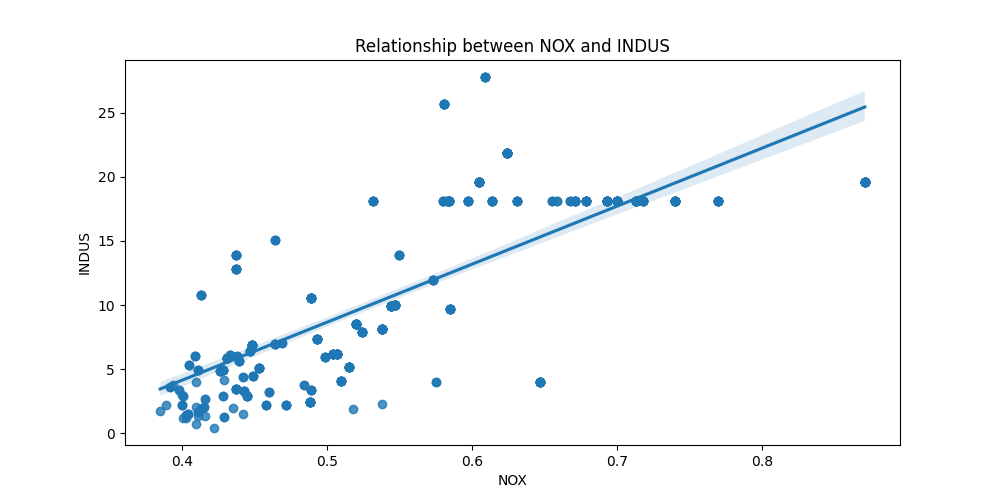

In [196]:
# Use simple linear regression to model the relationship between two variables
X = ratings_df[['NOX']]
Y = ratings_df[['INDUS']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.intercept_)
print(lm.coef_)
Y_hat = lm.predict(X)
Y_hat
sns.regplot(x = "NOX", y = "INDUS", data = ratings_df)
plt.title("Relationship between NOX and INDUS")
plt.show()
# On the graph we see a direct relationship between the two variables.
# In the case of an increase in the variables on the x-axis, 
# the variables on the y-axis increase, which indicates a direct relationship

In [197]:
# H0: NOX is not correlated with INDUS
# H1: NOX is correlated with INDUS
scipy.stats.pearsonr(ratings_df['INDUS'], ratings_df['NOX'])
# in Pearson correlation coefficientince test:
# The result is an answer of 0.76365..., which quantifies the strong, positive correlation we've already seen in the scatter plot.
# the p-value less than < 0.05, 
# that mean the Null hypothesis is rejected and there are correlation between Nitric Oxide and non-retail business acres per town.

(0.7636514469209189, 7.913361061211254e-98)

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
###### Regression analysis (Linear regression, Pearson Correlation)

###### H0: 'DIS' are not related to 'MEDV' value
###### H1: 'DIS' are related to 'MEDV' value

[18.39008833]
[[1.09161302]]


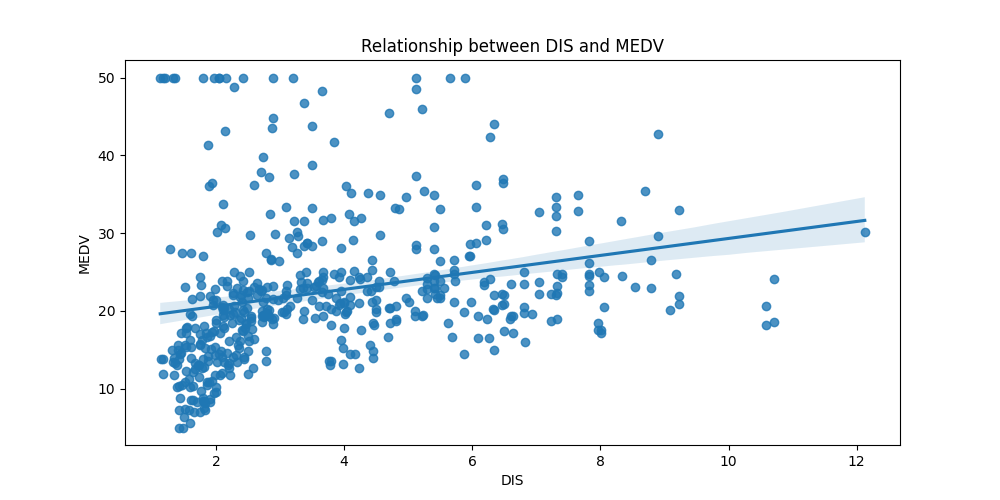

In [198]:
X = ratings_df[['DIS']]
Y = ratings_df[['MEDV']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.intercept_)
print(lm.coef_)
Y_hat = lm.predict(X)
Y_hat
sns.regplot(x = "DIS", y = "MEDV", data = ratings_df)
plt.title("Relationship between DIS and MEDV")
plt.show()

In [203]:
scipy.stats.pearsonr(ratings_df['DIS'], ratings_df['MEDV'])
# The result is an answer of 0.2499..., which mean weak positive correlation.

(0.24992873408590383, 1.2066117273368359e-08)

In [202]:
y = ratings_df['MEDV']
x = ratings_df['DIS'] 
x = sm.add_constant(x) 
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        23:54:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""